['Nebraska' 'South Dakota' 'Wyoming']
State
Nebraska        153
South Dakota    153
Wyoming         153
Name: count, dtype: int64
(459, 4)
               dt  AverageTemperature     State  Numericdt
350773 2001-01-01              -2.592  Nebraska     730486
350774 2001-02-01              -5.575  Nebraska     730517
350775 2001-03-01               2.077  Nebraska     730545
350776 2001-04-01              10.431  Nebraska     730576
350777 2001-05-01              15.878  Nebraska     730606
        Date  AverageTemperature
0 2001-01-01           -4.480333
1 2001-02-01           -7.541000
2 2001-03-01            0.590333
3 2001-04-01            7.889000
4 2001-05-01           13.908667


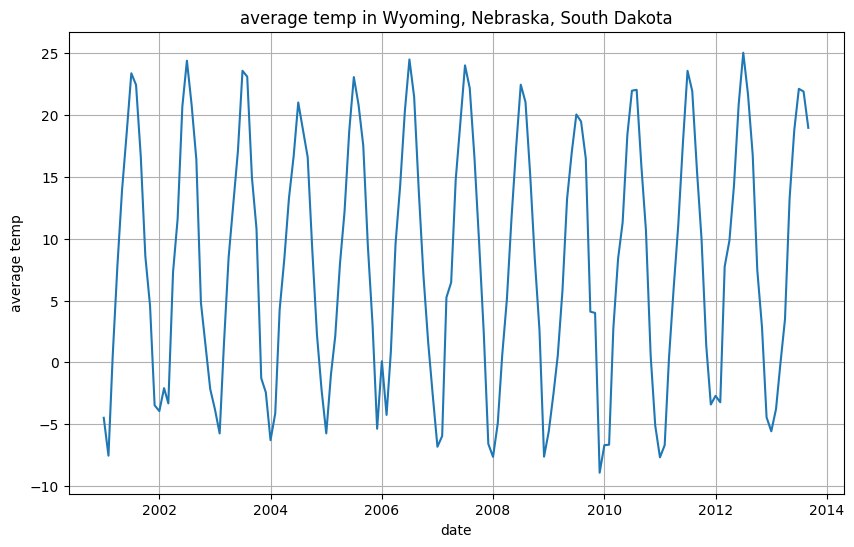

ftd paramaters: m-0.01807941129312437, b=8.282050863938895, A=-13.900970230111575, B=6.273128954746977


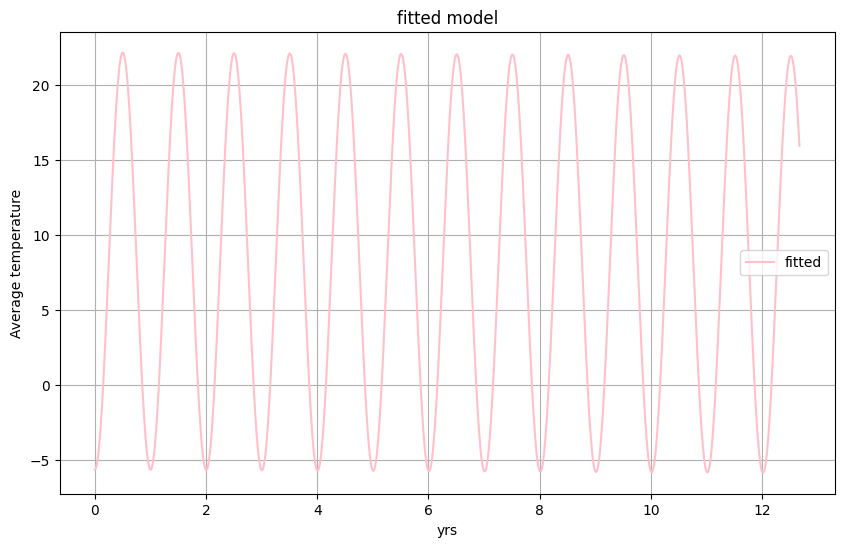

Covariance Matrix:
 [[ 1.27932166e-03 -8.10153608e-03  2.54620414e-04 -1.28379568e-06]
 [-8.10153608e-03  6.86314895e-02 -1.43624112e-03  4.49353263e-06]
 [ 2.54620414e-04 -1.43624112e-03  3.45186233e-02 -4.33963361e-06]
 [-1.28379568e-06  4.49353263e-06 -4.33963361e-06  3.37637534e-06]]
ftd params and errors:
m = -0.01807941129312437 +/- 0.03576760632427157
b = 8.282050863938895 +/- 0.26197612400151393
A = -13.900970230111575 +/- 0.1857918816753341
B = 6.273128954746977 +/- 0.0018374915888608226
equation:
F(x) = (-0.01807941129312437*x + (8.282050863938895) + (-13.900970230111575)*cos((6.273128954746977)*x)


In [27]:
import pandas as pd
file_path = "/Users/jessicadiaz/homeworks/BerkeleyHwJessica/GlobalLandTemperaturesByState.csv"

temperature_data = pd.read_csv(file_path)
#filter data
temperature_data = temperature_data[['dt', 'AverageTemperature', 'State']]
temperature_data['dt'] = pd.to_datetime(temperature_data['dt'], errors='coerce')
temperature_data['Year'] = temperature_data['dt'].dt.year
temperature_data = temperature_data[temperature_data['Year'] > 2000]


filtered_temp_data = temperature_data[temperature_data['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
filtered_temp_data = filtered_temp_data[['dt', 'AverageTemperature', 'State']]
filtered_temp_data['Numericdt'] = filtered_temp_data['dt'].apply(lambda x:x.toordinal())

print(filtered_temp_data['State'].unique())
print(filtered_temp_data['State'].value_counts())
print(filtered_temp_data.shape)
print(filtered_temp_data.head())

average_temp_dt = filtered_temp_data.groupby('dt')['AverageTemperature'].mean().reset_index()

average_temp_dt.columns = ['Date', 'AverageTemperature']
print (average_temp_dt.head())

import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
plt.plot(average_temp_dt['Date'], average_temp_dt['AverageTemperature'], label='Average Temperature')
plt.xlabel('date')
plt.ylabel('average temp')
plt.title('average temp in Wyoming, Nebraska, South Dakota')

plt.grid()
plt.show()

import numpy as np 
from scipy.optimize import curve_fit
def ex_equation(x,m,b,A,B):
    return m * x + b + A * np.cos(B*x)

x_info = filtered_temp_data['Numericdt'].values 
y_info = filtered_temp_data['AverageTemperature'].values 
x_info_years = (x_info - x_info.min()) / 365

guessed_values = [0, np.mean(y_info), 15, 2 * np.pi]

params, covarance = curve_fit(ex_equation, x_info_years, y_info, p0=guessed_values)
m, b, A, B = params
print (f"ftd paramaters: m{m}, b={b}, A={A}, B={B}")

x_fit = np.linspace(x_info_years.min(), x_info_years.max(), 1000)
y_fit = ex_equation(x_fit, m, b, A, B)

plt. figure(figsize=(10,6))
plt.plot(x_fit, y_fit, color='pink', label='fitted')
plt.xlabel('yrs')
plt.ylabel('Average temperature')
plt.title('fitted model')
plt.legend()
plt.grid()
plt.show()
print("Covariance Matrix:\n", covarance)

errors = np.sqrt(np.diag(covarance))
print("ftd params and errors:")
print(f"m = {m} +/- {errors[0]}")
print(f"b = {b} +/- {errors[1]}")
print(f"A = {A} +/- {errors[2]}")
print(f"B = {B} +/- {errors[3]}")

final_equation = f"F(x) = ({m}*x + ({b}) + ({A})*cos(({B})*x)"
print("equation:")
print(final_equation)